## K Nearest Neighbour Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_features=3, n_classes=2, n_redundant=1, random_state=999)

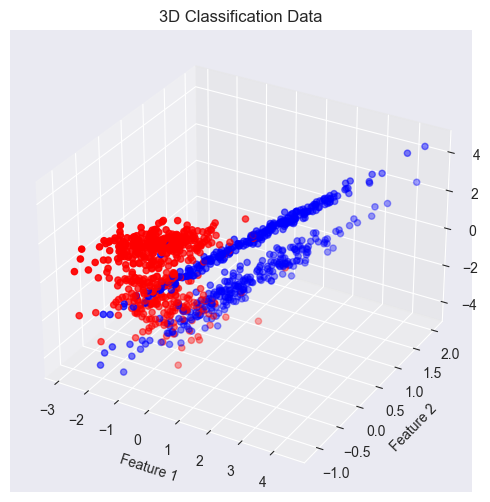

In [47]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# custom colors for classes 0 and 1
colors = ['red' if label == 0 else 'blue' for label in y]

ax.scatter(X[:,0], X[:,1], X[:,2], c=colors)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("3D Classification Data")

plt.show()


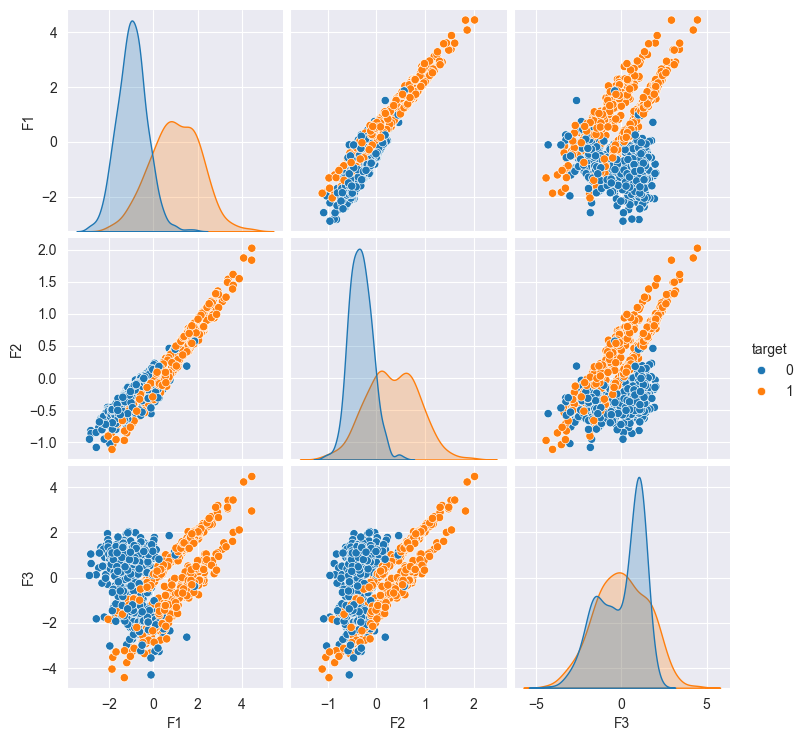

In [45]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(X, columns=["F1","F2","F3"])
df["target"] = y

sns.pairplot(df, hue="target", diag_kind="kde")
plt.show()

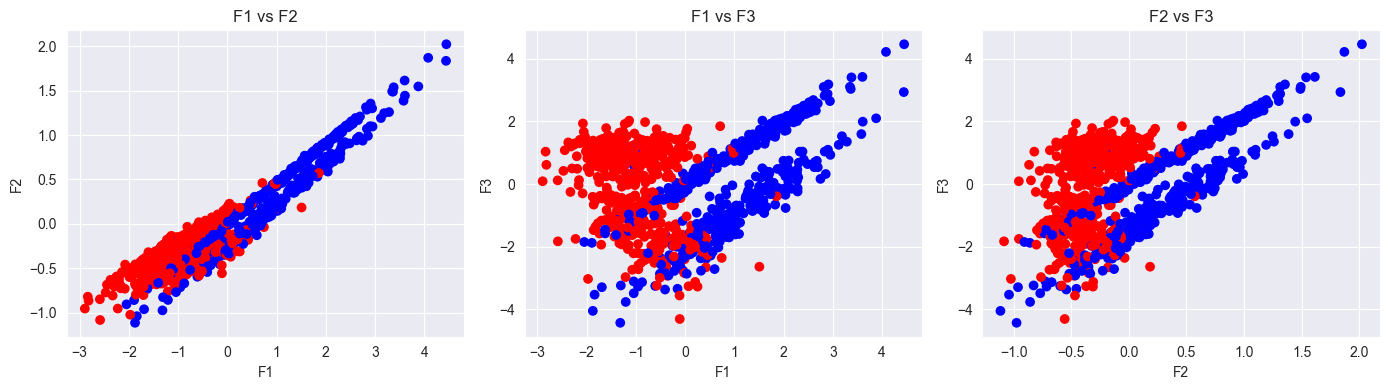

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1], c=colors)
plt.xlabel("F1"); plt.ylabel("F2"); plt.title("F1 vs F2")

plt.subplot(1,3,2)
plt.scatter(X[:,0], X[:,2], c=colors)
plt.xlabel("F1"); plt.ylabel("F3"); plt.title("F1 vs F3")

plt.subplot(1,3,3)
plt.scatter(X[:,1], X[:,2], c=colors)
plt.xlabel("F2"); plt.ylabel("F3"); plt.title("F2 vs F3")

plt.tight_layout()
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
classifier = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
classifier.fit(X_train, y_train)

,n_neighbors,15
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [38]:
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.906060606060606
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       169
           1       0.91      0.90      0.90       161

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

[[154  15]
 [ 16 145]]


In [40]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
print(k_range)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [33]:
param_grid=dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [34]:
grid=GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=3, scoring='accuracy')

In [35]:
grid.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,15


In [36]:
grid.best_params_

{'n_neighbors': 15}

In [42]:
grid.best_score_

np.float64(0.9014587337177025)

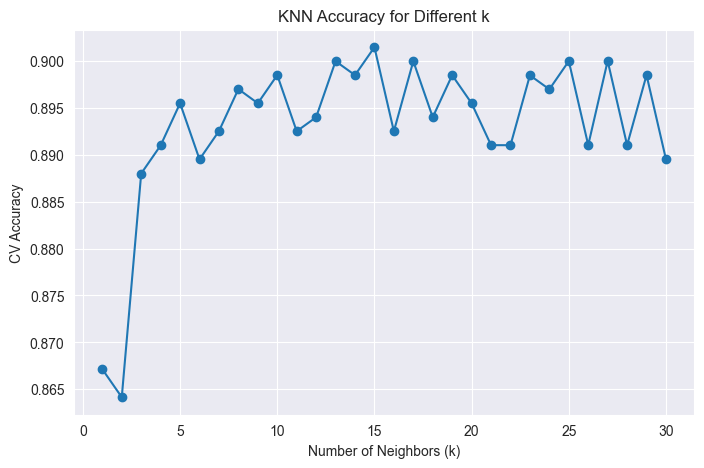

In [43]:
# Extract results
k_values = grid.cv_results_['param_n_neighbors'].data
mean_scores = grid.cv_results_['mean_test_score']

plt.figure(figsize=(8, 5))
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('CV Accuracy')
plt.title('KNN Accuracy for Different k')
plt.grid(True)
plt.show()

## K Nearest Neighbor Regressor

In [49]:
from sklearn.datasets import make_regression
X,y  = make_regression(n_samples=1000, n_features=2, noise=10, random_state=42)

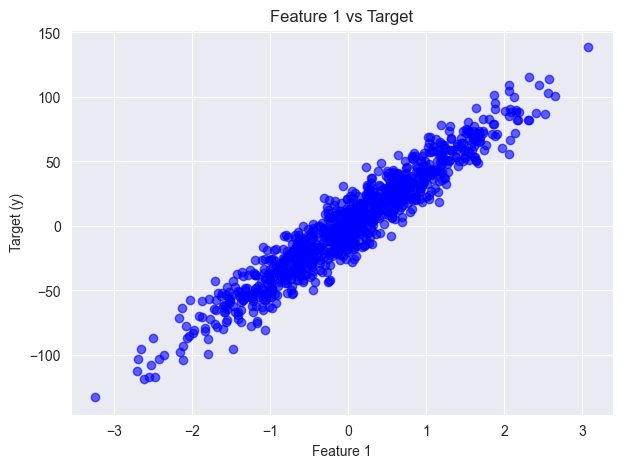

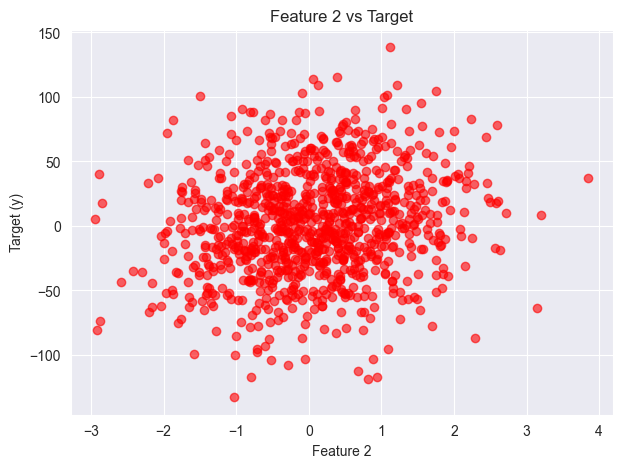

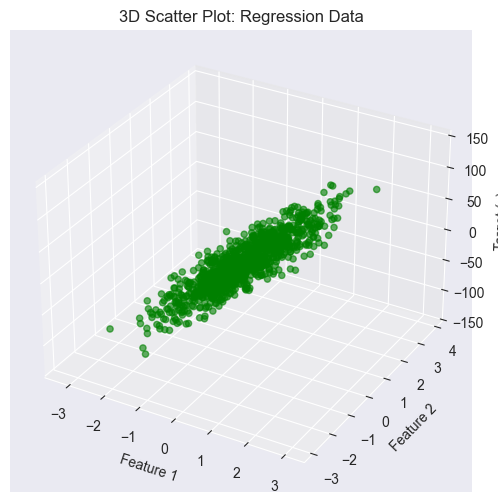

In [50]:
import matplotlib.pyplot as plt

# --- Plot 1: Feature 1 vs Target ---
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], y, c='blue', alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Target (y)")
plt.title("Feature 1 vs Target")
plt.grid(True)
plt.show()

# --- Plot 2: Feature 2 vs Target ---
plt.figure(figsize=(7,5))
plt.scatter(X[:, 1], y, c='red', alpha=0.6)
plt.xlabel("Feature 2")
plt.ylabel("Target (y)")
plt.title("Feature 2 vs Target")
plt.grid(True)
plt.show()

# --- Plot 3: 3D Plot using both features ---
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, c='green', alpha=0.6)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Target (y)")
ax.set_title("3D Scatter Plot: Regression Data")

plt.show()

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [52]:
regressor = KNeighborsRegressor(n_neighbors=6, algorithm='auto')
regressor.fit(X_train, y_train)

,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [53]:
y_reg_pred = regressor.predict(X_test)

In [54]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

score = r2_score(y_test, y_reg_pred)
mse = mean_squared_error(y_test, y_reg_pred)
mae = mean_absolute_error(y_test, y_reg_pred)
print("Mean squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean squared Error: ", np.sqrt(mse))
print("R2 score: ", score)

Mean squared Error:  127.45860414317289
Mean Absolute Error:  9.009462452972217
Root Mean squared Error:  11.289756602476995
R2 score:  0.9189275159979495
